In [1]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.base import clone
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales['constant'] = 1

In [141]:
def get_numpy_data(data_frame, features, output):
    if 'constant' not in features:
        features.insert(0, 'constant')
    if 'constant' not in data_frame.columns:
        data_frame['constant'] = 1
    return np.array(data_frame[features]), np.array(data_frame[output])

In [142]:
def predict_output(feature_matrix, weights):
    return np.dot(feature_matrix, weights)

In [143]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, constant_feature):
    derivative = 2*float(np.dot(errors.T, feature))
    if constant_feature:
        return derivative
    return derivative + 2*l2_penalty*weight

In [144]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output

In [145]:
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20.)
print('')

-5.6554166816e+13
-5.6554166816e+13



In [146]:
# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2.)

-22446749330.0
-22446749330.0


In [184]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    current_iteration = 1
    weights = np.array(initial_weights)
    while current_iteration <= max_iterations:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        for i in range(len(weights)):
            derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, i==0)
            weights[i] -= step_size*derivative
        current_iteration += 1
    return weights

In [185]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [186]:
# model 1
simple_feature = ['sqft_living']
my_output = 'price'
simple_feature_matrix, output = get_numpy_data(train_data, simple_features, my_output)
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0.0, 0.0])
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0, max_iterations)
simple_weights_0_penalty

array([ -1.63113515e-01,   2.63024369e+02])

In [187]:
# model 2
simple_feature = ['sqft_living']
my_output = 'price'
simple_feature_matrix, output = get_numpy_data(train_data, simple_feature, my_output)
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0.0, 0.0])
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
simple_weights_high_penalty

array([   9.76730382,  124.57217567])

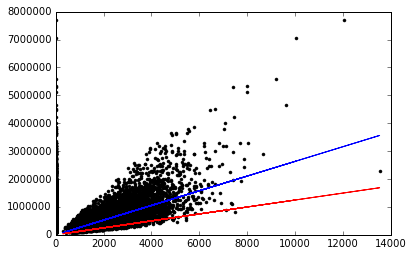

In [188]:
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [189]:
test_simple_feature = ['sqft_living']
test_output = 'price'
test_feature_matrix, test_output = get_numpy_data(test_data, test_simple_feature, test_output)

In [190]:
print('RSS for all zero weights ', np.sum(np.square(predict_output(test_feature_matrix, initial_weights)-test_output)))
print('RSS for no regularization ', np.sum(np.square(predict_output(test_feature_matrix, simple_weights_0_penalty)-test_output)))
print('RSS for high regularization ', np.sum(np.square(predict_output(test_feature_matrix, simple_weights_high_penalty)-test_output)))

RSS for all zero weights  1.78427328614e+15
RSS for no regularization  2.75723632154e+14
RSS for high regularization  6.9464210149e+14


In [191]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [192]:
initial_weights = np.zeros(3)
step_size = 1e-12
max_iterations = 1000
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0, max_iterations)
multiple_weights_0_penalty

array([  -0.35743483,  243.05416982,   22.41481497])

In [193]:
initial_weights = np.zeros(3)
step_size = 1e-12
max_iterations = 1000
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
multiple_weights_high_penalty

array([  6.74296579,  91.48927365,  78.43658766])

In [194]:
print('RSS for all zero weights ', np.sum(np.square(predict_output(test_feature_matrix, initial_weights)-test_output)))
print('RSS for no regularization ', np.sum(np.square(predict_output(test_feature_matrix, multiple_weights_0_penalty)-test_output)))
print('RSS for high regularization ', np.sum(np.square(predict_output(test_feature_matrix, multiple_weights_high_penalty)-test_output)))

RSS for all zero weights  1.78427328614e+15
RSS for no regularization  2.74067615919e+14
RSS for high regularization  5.00404800501e+14


In [195]:
test_feature_matrix[0], test_output[0]

(array([  1.00000000e+00,   1.43000000e+03,   1.78000000e+03]), 310000.0)

In [196]:
predict_output(test_feature_matrix[0], multiple_weights_0_penalty) - test_output[0]

77465.476058235392

In [197]:
predict_output(test_feature_matrix[0], multiple_weights_high_penalty) - test_output[0]

-39546.469678059395